In [239]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import albumentations as A

<h2>Data is been taken from open images which consist labels of 2239 images person & car class</h2>

In [64]:
coco_data ={}
with open('annotations/bbox-annotations.json', 'r') as json_file:
  coco_data = json.load(json_file) 

In [65]:
coco_data.keys()

dict_keys(['images', 'annotations', 'categories', 'licenses'])

In [66]:
coco_data['annotations'][0]

{'category_id': 1,
 'image_id': 0,
 'segmentation': [],
 'iscrowd': 0,
 'bbox': [846, 145, 146, 477],
 'area': 0.08855438232421875,
 'id': 0,
 'license': 2}

In [67]:
coco_data['images'][0]

{'file_name': 'image_000000001.jpg',
 'width': 1024,
 'height': 768,
 'id': 0,
 'license': 1}

In [68]:
coco_data['categories']

[{'id': 1, 'name': 'person', 'supercategory': 'none'},
 {'id': 2, 'name': 'car', 'supercategory': 'none'}]

In [69]:
from collections import defaultdict
annotations = defaultdict(list)
for im in coco_data['annotations']:
    annotations[im['image_id']].append(im)

In [70]:
for k,v in annotations.items():
    print(k,v)
    break

0 [{'category_id': 1, 'image_id': 0, 'segmentation': [], 'iscrowd': 0, 'bbox': [846, 145, 146, 477], 'area': 0.08855438232421875, 'id': 0, 'license': 2}, {'category_id': 1, 'image_id': 0, 'segmentation': [], 'iscrowd': 0, 'bbox': [848, 216, 175, 551], 'area': 0.12261072794596355, 'id': 1, 'license': 2}, {'category_id': 2, 'image_id': 0, 'segmentation': [], 'iscrowd': 0, 'bbox': [74, 159, 75, 81], 'area': 0.007724761962890625, 'id': 2, 'license': 2}, {'category_id': 2, 'image_id': 0, 'segmentation': [], 'iscrowd': 0, 'bbox': [153, 124, 658, 643], 'area': 0.5379918416341146, 'id': 3, 'license': 2}]


In [92]:
categories = {}
for c in coco_data['categories']:
    categories[c['id']] = c
categories

{1: {'id': 1, 'name': 'person', 'supercategory': 'none'},
 2: {'id': 2, 'name': 'car', 'supercategory': 'none'}}

In [82]:
df_list=[]
for d in coco_data['images']:
    im_id = d['id']
    data = list(d.values())
    #print(data)
    annot_list = annotations[im_id]
    for a in annot_list:
        row = data.copy()
        a = a.copy()
        bbox = a['bbox']
        del a['bbox']
        row.extend(a.values())
        row.extend(bbox)
        row.extend(categories[a['category_id']].values())
        df_list.append(row)
    
    
    
    

In [83]:
len(df_list)

16772

In [93]:
columnName = list(coco_data['images'][0].keys())
columnName.extend(list(a.keys()))
columnName.extend(['x','y','w','h'])
columnName.extend(list(categories[1].keys()))

In [95]:
len(columnName),len(df_list[0])

(19, 19)

In [96]:
import pandas as pd
df = pd.DataFrame(df_list, columns=columnName)
df.to_csv('data.csv', index=False)

In [120]:
df = pd.read_csv('data.csv')

In [121]:
df.head()

,file_name,width,height,id,license,category_id,image_id,segmentation,iscrowd,area,id.1,license.1,x,y,w,h,id.2,name,supercategory
0,image_000000001.jpg,1024,768,0,1,1,0,[],0,0.088554,0,2,846,145,146,477,1,person,none
1,image_000000001.jpg,1024,768,0,1,1,0,[],0,0.122611,1,2,848,216,175,551,1,person,none
2,image_000000001.jpg,1024,768,0,1,2,0,[],0,0.007725,2,2,74,159,75,81,2,car,none
3,image_000000001.jpg,1024,768,0,1,2,0,[],0,0.537992,3,2,153,124,658,643,2,car,none
4,image_000000002.jpg,1024,576,1,1,1,1,[],0,0.003370,4,2,488,281,28,71,1,person,none


# Data Analysis

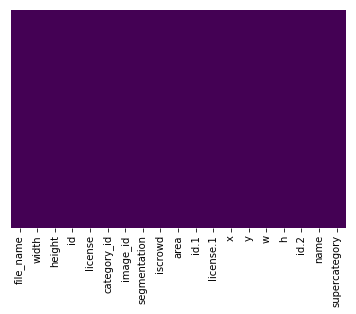

In [115]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

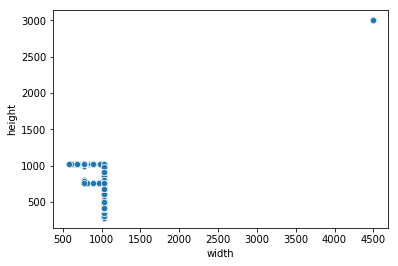

In [100]:
sns.scatterplot(x="width",y="height",data=df)

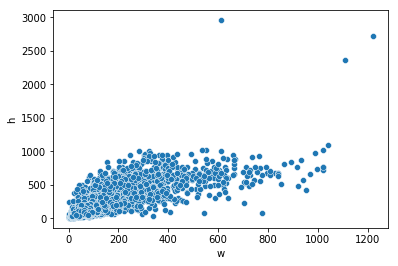

In [101]:
sns.scatterplot(x="w",y="h",data=df[df['name']=='person'])

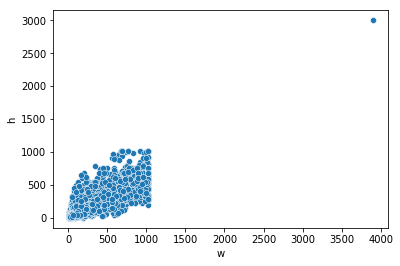

In [102]:
sns.scatterplot(x="w",y="h",data=df[df['name']=='car'])

In [103]:
df[df['height']>1500]

,file_name,width,height,id,license,category_id,image_id,segmentation,iscrowd,area,id,license,x,y,w,h,id,name,supercategory
15149,image_000001997.jpg,4496,3000,1996,1,1,1996,[],0,0.194299,15149,2,2731,638,1110,2361,1,person,none
15150,image_000001997.jpg,4496,3000,1996,1,2,1996,[],0,0.867816,15150,2,0,0,3903,2999,2,car,none
15151,image_000001997.jpg,4496,3000,1996,1,1,1996,[],0,0.084129,15151,2,1090,508,1042,1089,1,person,none
15152,image_000001997.jpg,4496,3000,1996,1,1,1996,[],0,0.245886,15152,2,1947,283,1222,2714,1,person,none
15153,image_000001997.jpg,4496,3000,1996,1,1,1996,[],0,0.133641,15153,2,3883,42,610,2955,1,person,none


# outlier data remove

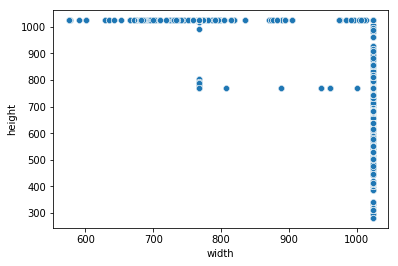

In [155]:
df = df[df['height']<1500]
sns.scatterplot(x="width",y="height",data=df)

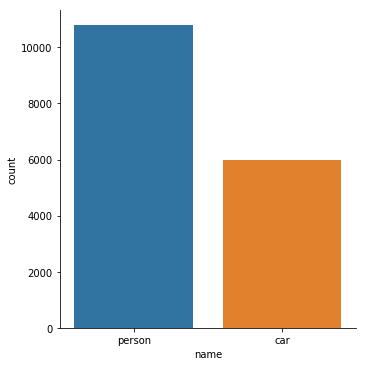

In [156]:
sns.catplot(x="name", kind="count", data=df)

In [117]:
len(df.file_name.unique())

2239

In [157]:
df.width.describe()

count    16767.000000
mean       998.039423
std         83.361091
min        575.000000
25%       1024.000000
50%       1024.000000
75%       1024.000000
max       1024.000000
Name: width, dtype: float64

In [158]:
df.height.describe()

count    16767.000000
mean       742.249299
std        119.741265
min        282.000000
25%        683.000000
50%        696.000000
75%        768.000000
max       1024.000000
Name: height, dtype: float64

# Generate Pascal Voc xml

In [240]:
from pascal_voc_writer import Writer
#df1_grouped = df.groupby(by="file_name")

In [161]:
for group_name, df_group in df1_grouped:
    #print('\nCREATE TABLE {}'.format(group_name))
    file_name = group_name.split('.')[0]
    #writer = Writer('group_name', 800, 400)
    writer = None

    for row_index, row in df_group.iterrows():
        if not writer:
            #print(row['width'],row['height'])
            writer = Writer(group_name, row['width'], row['height'])
        writer.addObject(row['name'], row['x'], row['y'], row['x']+row['w'], row['y']+row['h'])
        
    writer.save('trainval/pascal/{}.xml'.format(file_name))       
        
    

In [162]:
df.to_csv('data_clean.csv', index=False)

In [241]:
df = pd.read_csv('data_clean.csv')

In [242]:
df.head()

,file_name,width,height,id,license,category_id,image_id,segmentation,iscrowd,area,id.1,license.1,x,y,w,h,id.2,name,supercategory
0,image_000000001.jpg,1024,768,0,1,1,0,[],0,0.088554,0,2,846,145,146,477,1,person,none
1,image_000000001.jpg,1024,768,0,1,1,0,[],0,0.122611,1,2,848,216,175,551,1,person,none
2,image_000000001.jpg,1024,768,0,1,2,0,[],0,0.007725,2,2,74,159,75,81,2,car,none
3,image_000000001.jpg,1024,768,0,1,2,0,[],0,0.537992,3,2,153,124,658,643,2,car,none
4,image_000000002.jpg,1024,576,1,1,1,1,[],0,0.003370,4,2,488,281,28,71,1,person,none


# Augmentation data

In [164]:
!python -m pip install -q -U albumentations

^C


In [170]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [201]:
transform = A.Compose(
    [A.HorizontalFlip(p=1),
     A.OneOf([
        A.HueSaturationValue(),
        A.RandomBrightnessContrast(p=0.7),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ])
    
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

In [243]:
augmentData = []
category_id_to_name = {1: 'person', 2: 'car'}
df1_grouped = df.groupby(by="file_name")

for group_name, df_group in df1_grouped:
        try:
            augrow = []
            bboxex = []
            category_ids = []
            #print('\nCREATE TABLE {}'.format(group_name))
            file_name = group_name.split('.')[0]


            for row_index, row in df_group.iterrows():
                bboxex.append([row['x'], row['y'],row['w'], row['h']] )
                category_ids.append(row['id.2'])

            image = cv2.imread('images/{}.jpg'.format(file_name))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
            transformed = transform(image=image, bboxes=bboxex, category_ids=category_ids)
            pil_img = Image.fromarray(transformed['image'])
            pil_img.save('augment/{}_augment.jpg'.format(file_name))
            width, height = pil_img.size
            writer = Writer(group_name, width, height)

            for i in range(len(transformed['bboxes'])):
                x,y,w,h=transformed['bboxes'][i]
                class_nam =category_id_to_name[transformed['category_ids'][i]]
                writer.addObject(class_nam,int(x), int(y), int(x+w), int(y+h))
                augrow = ['{}_augment.jpg'.format(file_name),width, height]
                augrow.extend(transformed['bboxes'][i])
                augrow.append(class_nam)
                augrow.append(transformed['category_ids'][i])
                augmentData.append(augrow)    

            writer.save('trainval/augment/{}_augment.xml'.format(file_name))
        except:
            print('Exception',file_name)
    

    
    


Exception image_000000761
Exception image_000001379


In [244]:
len(augmentData)

16734

In [ ]:
file_name,len(df1_grouped)

In [190]:
import cv2
image = cv2.imread('images/{}.jpg'.format(file_name))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

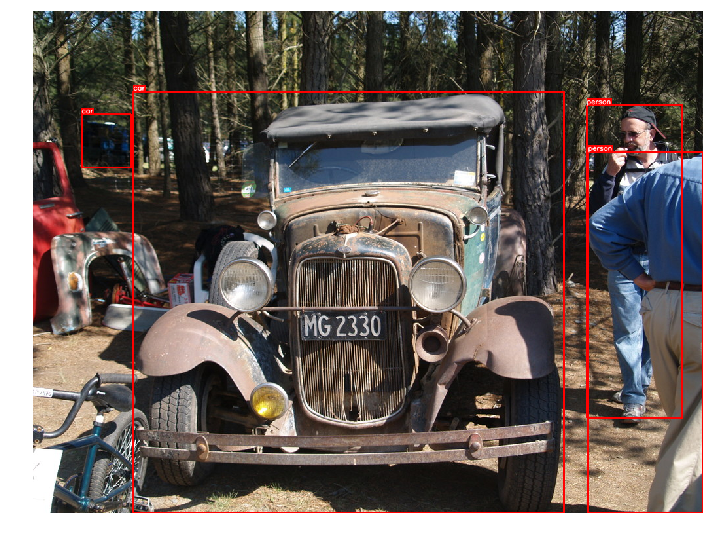

In [191]:
visualize(image, bboxex, category_ids, category_id_to_name)

In [202]:
#random.seed(7)
transformed = transform(image=image, bboxes=bboxex, category_ids=category_ids)


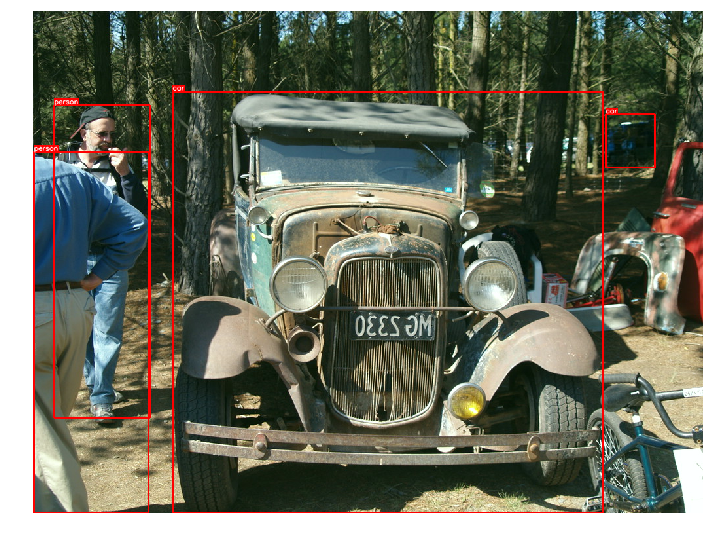

In [204]:
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

# Train and Test Split

In [261]:
from sklearn.model_selection import train_test_split
train_dataset, val_set = train_test_split(dta, test_size=0.2)

In [263]:
len(train_dataset),len(val_set)

(1790, 448)

In [279]:
train_dataset = [ x.split('.')[0] for x in train_dataset]
val_set = [ x.split('.')[0] for x in val_set]

In [283]:
import glob,shutil,os
files = glob.glob('pascal/*.xml')

for f in files:
    file_name= os.path.basename(f).split('.')[0]
    if file_name in train_dataset:
        #print(file_name)
        shutil.copy(f,'trainval/training/train/{}.xml'.format(file_name))
    else:
        shutil.copy(f,'trainval/training/test/{}.xml'.format(file_name))
        
       
        #pass
    
    
    

In [ ]:
# copy augmented data only training

import glob,shutil,os
files = glob.glob('augment/*.xml')

for f in files:
    file_name= os.path.basename(f).split('_augment')[0]
    orgFileName = os.path.basename(f).split('.')[0]
    if file_name in train_dataset:
        #print(file_name,orgFileName)
        shutil.copy(f,'trainval/training/train/{}.xml'.format(orgFileName))
    
       
    
    

In [291]:
len(glob.glob('training/train/*.xml')),len(glob.glob('training/test/*.xml')),files[0]

(3579, 448, 'augment/image_000000001_augment.xml')

TRAIN = 3579 ,  TEST = 448